<h1>Module 2.5: Drug Dosage</h1>
<p>While the common subject for this module is drug dosage, we will use this module to introduce inputs into the system which are time varying and multicompartment models.  The general differential equation for these situations is still $\frac{dQ}{dt}=-KQ$ in which $Q$ is the amount of drug.  This will change slightly if we are considering the flow or rate to be dependent on a concentration difference.  Note that in general, the concentration is $c=\frac{Q}{V}$ or $c=\frac{Q}{M}$ for volumetric concentration or mass concentration.</p>

<h2>Initialization</h2>
<p>This section contains initialization code which gives this notebook the resources it needs to run<p>

In [1]:
#This code performs the necessary steps to prepare to plot.
from pylab import *     #Import plotting module matplotlib as well as other modules
                        #into the global namespace.
                        #Set the default plot to be inline rather than a new window.
        
#The following sets the figures to be in the notebook.
%matplotlib inline    
import inspect        #This allows us to print the source code in this notebook.

from Chapter2 import *      #Import the custom functions from this project.
goldenratio=1/2*(1+sqrt(5)) #The next few lines are used for the size of plots
fsx=7                       #Width (in inches) for the figures.
fsy=fsx/goldenratio         #Height (in inches) for the figures.

<h2>Multiple Drug Doses</h2>
<p>We now find the blood stream concenctration for a drug with multiple doses taken at a specified interval.  In this model we will consider the drug to be completely absorbed into the body in a single instance, and we will consider the body as a single compartment.</p>
<p>The code for this model is below</p>

In [2]:
print(inspect.getsource(multiple_dose_drug))

def multiple_dose_drug(dt, timemax, dose, interval, halflife, alpha):
    """Calculates blood concentration for multiple dose Dilantin as described in the text"""

    EliminationConstant = - math.log(0.5)/halflife
    drug_in_system = 0
    t = 0
    t_array = [t]
    drug_in_system_array = [drug_in_system]

    while t < timemax:
        if t % interval < dt:
            drug_in_system += alpha * dose
        drug_in_system -= EliminationConstant * drug_in_system * dt
        t += dt
        t_array.append(t)
        drug_in_system_array.append(drug_in_system/3000)

    return t_array, drug_in_system_array



In [3]:
dtime, dis = multiple_dose_drug(.1,200, 100*1000, 8, 22, 0.12)

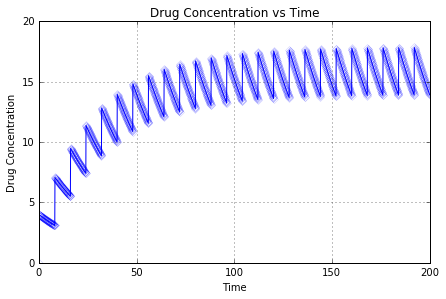

In [4]:
figure(figsize=(fsx, fsy))
plot(dtime, dis, 'D-', MFC=(1,0,0,0),mec=(0, 0, 1, 0.2))
axis([0, 200, 0, 20])
grid(True)
xlabel('Time')
ylabel('Drug Concentration')
title('Drug Concentration vs Time')
show()

<p>The figure above is identical to figure 2.5.4 from the text.  We now know we have a good base simulation running.  We will now work to extend it.</p>

<h2>Module 2.5 - Project 3</h2>
<p>In attempt to raise the concentration of a drug in the system to the minimum effective concentration quickly, sometimes doctors give a patient a loading dose, which is an initial dosage that is much higher than the maintenance dosage. A loading dose for Dilantin is three doses - 400mg, 300mg and 300mg two hours apart. Twenty-four hours after the loading dose, normal dosage of 100mg every eight hours begins. Develop a model for this dosage regime.</p>
<p>The code for this model is below.  The code takes the loading dosages as a passed parameter.  It then checks if we are in the loading time.  Once all the loading values have been used, the simulations transitions to a dose at a given interval.</p>

In [5]:
print(inspect.getsource(multiple_dose_drug_with_loading))

def multiple_dose_drug_with_loading(dt, timemax, dose, interval, halflife, alpha, loading):
    """Calculates blood concentration for multiple dose Dilantin with loading doses."""
    """The variable loading is to be a list of (time, dose) tuples for the loading doses."""
    """Regular dosing begins interval after the last loading dose."""

    EliminationConstant = - math.log(0.5)/halflife
    drug_in_system = 0
    t = 0
    t_array = [t]
    drug_in_system_array = [drug_in_system]
    LoadDose = 0
    Loaded = False
    NextDoseTime = 0

    while t < timemax:
        #Add drug to system if time for another does.
        if Loaded:
            if t >= NextDoseTime:
                drug_in_system += alpha * dose
                NextDoseTime += interval
        else:
            if t>=loading[LoadDose][0]:
                drug_in_system += alpha * loading[LoadDose][1]
                LoadDose += 1
                Loaded = True if LoadDose >= len(loading) else False
                Ne

In [6]:
loading=[[0,400*1000], [2,300*1000], [4,300*1000],[16,0]]
dtime, dis = multiple_dose_drug_with_loading(.1,200, 100*1000, 8, 22, 0.12,loading)

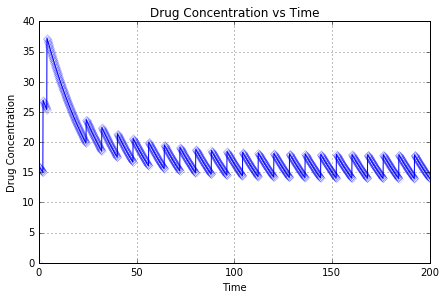

In [7]:
figure(figsize=(fsx, fsy))
plot(dtime, dis, 'D-', MFC=(1,0,0,0),mec=(0, 0, 1, 0.2))
axis([0, 200, 0, 40])
grid(True)
xlabel('Time')
ylabel('Drug Concentration')
title('Drug Concentration vs Time')
show()

<p>Notice that this model predicts a concentration that is too high durning the loading phase.  This can espicially be seen in the figure below which shows the concentration durning the loading time.</p>

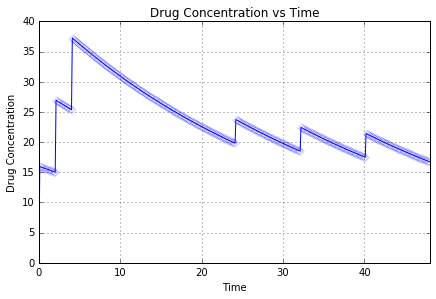

In [8]:
figure(figsize=(fsx, fsy))
plot(dtime, dis, 'D-', MFC=(1,0,0,0),mec=(0, 0, 1, 0.2))
axis([0, 48, 0, 40])
grid(True)
xlabel('Time')
ylabel('Drug Concentration')
title('Drug Concentration vs Time')
show()

<p>Let us imporove the drug loading.  With a bit of trial and error, the solution below might work better.</p>

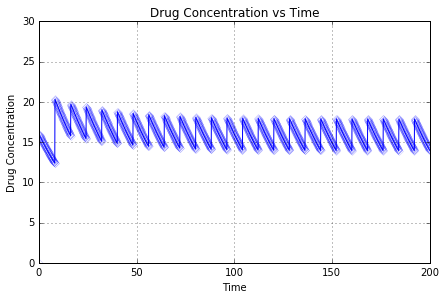

In [9]:
loading=[[0,400*1000],[8,200*1000]]
dtime, dis = multiple_dose_drug_with_loading(.1,200, 100*1000, 8, 22, 0.12,loading)
figure(figsize=(fsx, fsy))
plot(dtime, dis, 'D-', MFC=(1,0,0,0),mec=(0, 0, 1, 0.2))
axis([0, 200, 0, 30])
grid(True)
xlabel('Time')
ylabel('Drug Concentration')
title('Drug Concentration vs Time')
show()

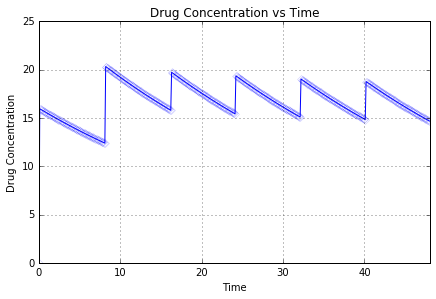

In [10]:
figure(figsize=(fsx, fsy))
plot(dtime, dis, 'D-', MFC=(1,0,0,0),mec=(0, 0, 1, 0.2))
axis([0, 48, 0, 25])
grid(True)
xlabel('Time')
ylabel('Drug Concentration')
title('Drug Concentration vs Time')
show()

<h2>Module 2.5 - Project 5</h2>
<p>Develop a two-compartment model for Dilantin, where the rate of change of absorption from the stomach to the blood serum is proportional to the volume of the stomach and to the difference of the drug concentrations in the stomach and serum. Assume the volume of the stomach is 500 mL.</p>
<p>The code for this model is below.</p>

In [11]:
print(inspect.getsource(Drug_Dose_Two_Comaptment))

def Drug_Dose_Two_Comaptment(dt, timemax, dose, V, interval, R01, R0e, R1e, loading):
    """A two compartmetn model for drug dosing."""

    Q=[0,0]                     #Q is the amount of drug in each compartment.
    t = 0
    results_array = [[t, Q[0]/V[0], Q[1]/V[1]]]
    LoadDose = 0
    Loaded = False
    NextDoseTime = 0

    while t < timemax:
        #Add drug to system if time for another does.
        if Loaded:
            if t >= NextDoseTime:
                Q[0] += dose
                NextDoseTime += interval
        else:
            if t>=loading[LoadDose][0]:
                Q[0] += loading[LoadDose][1]
                LoadDose += 1
                Loaded = True if LoadDose >= len(loading) else False
                NextDoseTime = t + interval

        #Transfer Drug between compartments
        Q[0] += R01 * (Q[1]/V[1] - Q[0]/V[0]) * dt
        Q[1] += R01 * (Q[0]/V[0] - Q[1]/V[1]) * dt

        #Eliminate Propper Amount of Drug from System
        Q[0] -= R0e * Q[

<h3>Equations</h3>
<p>The eqations for this model are:
$$\frac{dQ_0}{dt}=R_{01} \left(\frac{Q_1}{V_1}-\frac{Q_0}{V_0}\right)-R_{0e}Q_1+\delta Dose$$
$$\frac{dQ_1}{dt}=R_{01} \left(\frac{Q_0}{V_0}-\frac{Q_1}{V_1}\right)-R_{1e}Q_1$$
in which $Q$ is the drug amount in each compartment, $V$ is the volume of each compartment, the $R$ values are the flow rate constants, and $\delta Dose$ represents the input of drug into the system.
</p>

<h3>Rate Constants</h3>
<p>The rate constants are below.  The elimination constant from the blood should be the same as the previous problem.  We assume that the drug will be eliminated from the intestinal system much faster.<p>

In [19]:
R01 = 0.1
R0e=-log(0.5)/8
R1e=-log(0.5)/22
print([R0e, R1e])

[0.086643397569993161, 0.031506690025452061]


<h3>Single Dose Effect</h3>
<p>Let us first check this model with a sinlge dose into compartment 0 at $t=0$</p>

In [21]:
dt=1
loading=[[0,400*1000],[200,0]]
#Drug_Dose_Two_Comaptment(dt, timemax, dose, V, interval, R01, R0e, R1e, loading)
res=Drug_Dose_Two_Comaptment(dt, 200, 100*1000, [500, 3000], \
                         8, R01, R0e, R1e,loading)
t  = [r[0] for r in res]
c0 = [r[1] for r in res]
c1 = [r[2] for r in res]

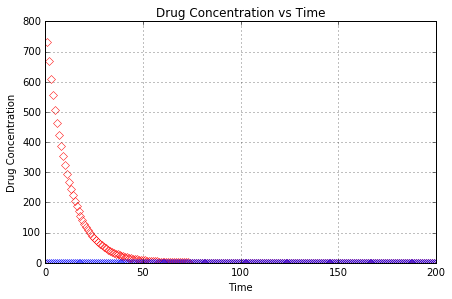

In [22]:
figure(figsize=(fsx, fsy))
plot(t, c0, 'D', MFC=(1,0,0,0),mec=(1, 0, 0, 1))
plot(t, c1, 'D', MFC=(1,0,0,0),mec=(0, 0, 1, 1))
#axis([0, 100, 0, 25])
grid(True)
xlabel('Time')
ylabel('Drug Concentration')
title('Drug Concentration vs Time')
show()

<p>The concentrations in the two compartments have different orders of magnitudes.  We will change the compartment 0 order of magnitude so that we can observe both concentrations in the same graph.</p>

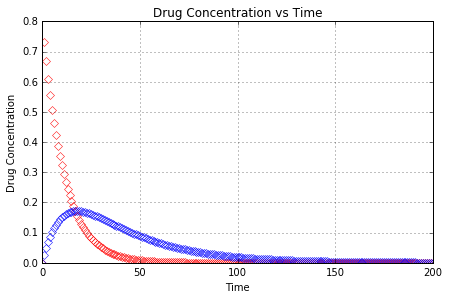

In [23]:
c0 = [c/1000 for c in c0]
figure(figsize=(fsx, fsy))
plot(t, c0, 'D', MFC=(1,0,0,0),mec=(1, 0, 0, 1))
plot(t, c1, 'D', MFC=(1,0,0,0),mec=(0, 0, 1, 1))
#axis([0, 100, 0, 25])
grid(True)
xlabel('Time')
ylabel('Drug Concentration')
title('Drug Concentration vs Time')
show()

<p>This seems like a resonable result so we will continue with a realistic multiple dosage.</p>

<h3>Two Compartment Model with Multiple Doses</h3>

In [33]:
dt=.05
loading=[[0,400*1000], [2,300*1000], [4,300*1000],[16,0]]
#Drug_Dose_Two_Comaptment(dt, timemax, dose, V, interval, R01, R0e, R1e, loading)
res=Drug_Dose_Two_Comaptment(dt, 100, 100*1000, [500, 3000], \
                         8, R01, R0e, R1e,loading)
t  = [r[0] for r in res]
c0 = [r[1]/1000 for r in res]
c1 = [r[2] for r in res]

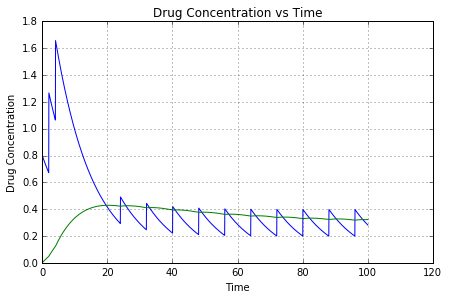

In [35]:
figure(figsize=(fsx, fsy))
plot(t, c0, '-', MFC=(1,0,0,0),mec=(1, 0, 0, 1))
plot(t, c1, '-', MFC=(1,0,0,0),mec=(0, 0, 1, 1))
#axis([0, 100, 0, 25])
grid(True)
xlabel('Time')
ylabel('Drug Concentration')
title('Drug Concentration vs Time')
show()

<p>Since we are just guessing at rate constants, we can adjust those slightly to give blood concentrations that are within the desired range.</p>

In [45]:
R01 = 0.075
R0e=-log(0.5)/8
R1e=-log(0.5)/14
print([R0e, R1e])

[0.086643397569993161, 0.049510512897138946]


In [46]:
dt=.05
loading=[[0,400*1000], [2,300*1000], [4,300*1000],[16,0]]
#Drug_Dose_Two_Comaptment(dt, timemax, dose, V, interval, R01, R0e, R1e, loading)
res=Drug_Dose_Two_Comaptment(dt, 100, 100*1000, [500, 3000], \
                         8, R01, R0e, R1e,loading)
t  = [r[0] for r in res]
c0 = [r[1]/10000 for r in res]
c1 = [r[2] for r in res]

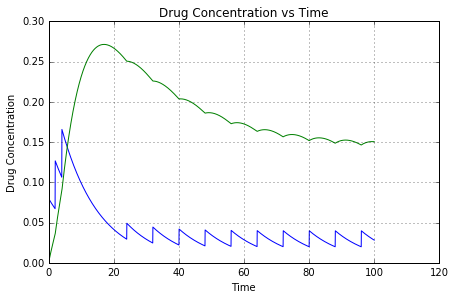

In [47]:
figure(figsize=(fsx, fsy))
plot(t, c0, '-', MFC=(1,0,0,0),mec=(1, 0, 0, 1))
plot(t, c1, '-', MFC=(1,0,0,0),mec=(0, 0, 1, 1))
#axis([0, 100, 0, 25])
grid(True)
xlabel('Time')
ylabel('Drug Concentration')
title('Drug Concentration vs Time')
show()